In [1]:
import pandas as pd
import json
import seaborn as sb
import numpy as np
from sklearn.cluster import KMeans

In [2]:
file_name = "DEBRV_DEHAM_historical_routes.csv"

In [3]:
raw_data = pd.read_csv(file_name)
raw_data.head()

,id,from_seq,to_seq,from_port,to_port,leg_duration,count,points
0,imo_9462794,127,128,DEBRV,DEHAM,36406308,135,"[[8.489074, 53.615707, 1509423228430, 14.0], [..."
1,imo_9454230,196,197,DEBRV,DEHAM,37389167,155,"[[8.48967, 53.614338, 1507290057531, 12.5], [8..."
2,imo_9454230,241,242,DEBRV,DEHAM,35623991,196,"[[8.499015, 53.60522, 1509682757817, 15.9], [8..."
3,imo_9372200,150,151,DEBRV,DEHAM,34345681,156,"[[8.495334, 53.609833, 1511932247447, 11.2], [..."
4,imo_9376048,116,117,DEHAM,DEBRV,32515761,189,"[[9.915167, 53.542168, 1508734759773, 7.6], [9..."


In [4]:
raw_data['id'] = raw_data['id'].astype(str)
raw_data['from_port'] = raw_data['from_port'].astype(str)
raw_data['to_port'] = raw_data['to_port'].astype(str)

In [5]:
raw_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 728 entries, 0 to 727
Data columns (total 8 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   id            728 non-null    object
 1   from_seq      728 non-null    int64 
 2   to_seq        728 non-null    int64 
 3   from_port     728 non-null    object
 4   to_port       728 non-null    object
 5   leg_duration  728 non-null    int64 
 6   count         728 non-null    int64 
 7   points        728 non-null    object
dtypes: int64(4), object(4)
memory usage: 45.6+ KB


## Reduce route from DENRV to DEHAM

In [6]:
#Create a new frame from flatten points list

debrv_deham = raw_data[raw_data.from_port.str.contains("DEBRV")]

data_list = []
for row in debrv_deham.itertuples(index=False):
    parsed_list = json.loads(row.points)
    data_list += parsed_list

In [7]:
df = pd.DataFrame(data_list, columns=['longitude', 'latitude', 'timestamp', 'speed'])

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 81359 entries, 0 to 81358
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   longitude  81359 non-null  float64
 1   latitude   81359 non-null  float64
 2   timestamp  81359 non-null  int64  
 3   speed      81331 non-null  float64
dtypes: float64(3), int64(1)
memory usage: 2.5 MB


In [9]:
df.head()

,longitude,latitude,timestamp,speed
0,8.489074,53.615707,1509423228430,14.0
1,8.476499,53.621193,1509423365984,14.8
2,8.463407,53.626442,1509423498599,15.8
3,8.450949,53.631893,1509423624892,15.6
4,8.438425,53.637140,1509423750263,15.7


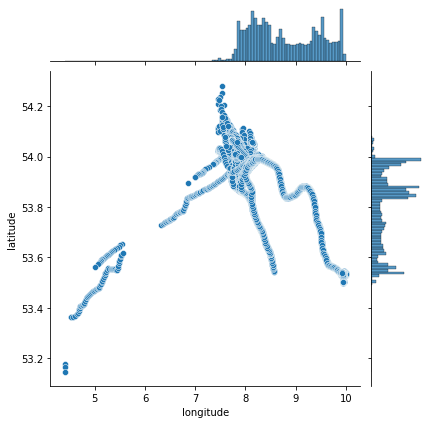

In [10]:
sb.jointplot(data=df, y="latitude", x="longitude")

In [11]:
Q1 = df.quantile(0.25)
Q3 = df.quantile(0.75)
IQR = Q3 - Q1
print(IQR)
print(Q1.longitude)
print(Q3.longitude)

longitude    1.209520e+00
latitude     2.394255e-01
timestamp    7.194836e+09
speed        4.900000e+00
dtype: float64
8.190154
9.3996745


In [12]:
index = df[(df['longitude'] <=(Q1.longitude - 1.5*IQR.longitude))|(df['longitude'] >= (Q3.longitude + 1.5*IQR.longitude))].index
df.drop(index, inplace=True)

index = df[(df['latitude'] <= (Q1.latitude - 1.5*IQR.latitude))|(df['latitude'] >= (Q3.latitude + 1.5*IQR.latitude))].index
df.drop(index, inplace=True)

df.describe()

,longitude,latitude,timestamp,speed
count,81271.000000,81271.000000,8.127100e+04,81243.000000
mean,8.778926,53.798628,1.504503e+12,12.759563
std,0.667404,0.149385,4.416285e+09,5.218836
min,6.378350,53.497500,1.496311e+12,0.000000
25%,8.191340,53.672768,1.500930e+12,11.200000
50%,8.666000,53.841667,1.504774e+12,14.000000
75%,9.399928,53.911686,1.508128e+12,16.100000
max,9.998112,54.250584,1.512052e+12,102.300000


In [13]:
coords = df[['latitude','longitude']]

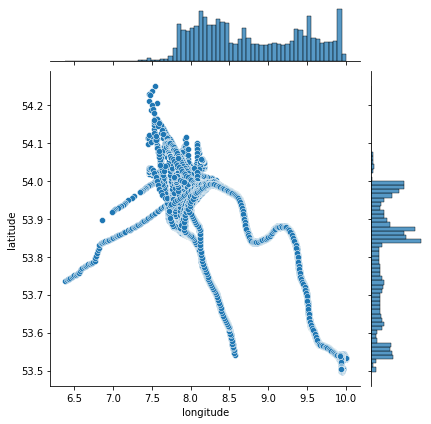

In [14]:
sb.jointplot(data=coords, y="latitude", x="longitude")

In [15]:
k_means = KMeans(n_clusters=2000).fit(coords)

In [16]:
k_means.cluster_centers_

array([[53.63728518,  8.43750131],
       [53.64335422,  9.52139674],
       [53.85304628,  8.00592568],
       ...,
       [53.96835331,  8.08017925],
       [53.97545159,  8.04616468],
       [53.779165  ,  8.16028459]])

## Reduce route from DEHAM to DENRV

In [17]:
#Create a new frame from flatten points list

deham_debrv = raw_data[raw_data.from_port.str.contains("DEHAM")]

data_list = []
for row in deham_debrv.itertuples(index=False):
    parsed_list = json.loads(row.points)
    data_list += parsed_list

In [18]:
df = pd.DataFrame(data_list, columns=['longitude', 'latitude', 'timestamp', 'speed'])

In [19]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 80168 entries, 0 to 80167
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   longitude  80168 non-null  float64
 1   latitude   80168 non-null  float64
 2   timestamp  80168 non-null  int64  
 3   speed      80122 non-null  float64
dtypes: float64(3), int64(1)
memory usage: 2.4 MB


In [20]:
df.head()

,longitude,latitude,timestamp,speed
0,9.915167,53.542168,1508734759773,7.6
1,9.896334,53.541832,1508735070213,7.9
2,9.878166,53.542330,1508735370382,7.6
3,9.866667,53.543667,1508735557000,7.7
4,9.851500,53.546500,1508735800507,9.7


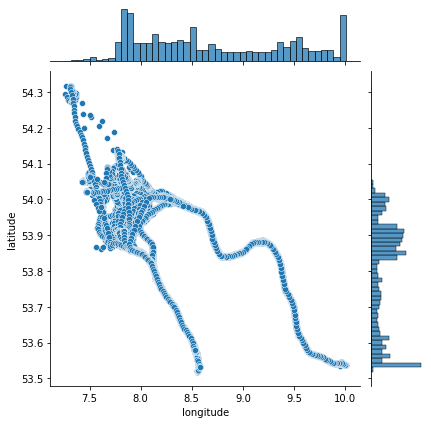

In [21]:
sb.jointplot(data=df, y="latitude", x="longitude")

In [22]:
Q1 = df.quantile(0.25)
Q3 = df.quantile(0.75)
IQR = Q3 - Q1
print(IQR)
print(Q1.longitude)
print(Q3.longitude)

longitude    1.348204e+00
latitude     2.707195e-01
timestamp    6.152018e+09
speed        1.510000e+01
dtype: float64
8.0429625
9.391167


In [23]:
index = df[(df['longitude'] <=(Q1.longitude - 1.5*IQR.longitude))|(df['longitude'] >= (Q3.longitude + 1.5*IQR.longitude))].index
df.drop(index, inplace=True)

index = df[(df['latitude'] <= (Q1.latitude - 1.5*IQR.latitude))|(df['latitude'] >= (Q3.latitude + 1.5*IQR.latitude))].index
df.drop(index, inplace=True)

df.describe()

,longitude,latitude,timestamp,speed
count,80163.000000,80163.000000,8.016300e+04,80117.000000
mean,8.699697,53.791733,1.504086e+12,10.026962
std,0.730636,0.153805,4.208236e+09,6.915012
min,7.255475,53.519066,1.496426e+12,0.000000
25%,8.043074,53.637669,1.500909e+12,0.500000
50%,8.520305,53.844660,1.504388e+12,12.600000
75%,9.391167,53.908400,1.507061e+12,15.600000
max,10.008355,54.313515,1.512046e+12,102.300000


In [24]:
coords = df[['latitude','longitude']]

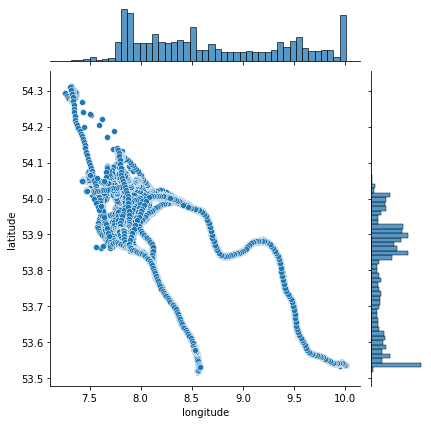

In [25]:
sb.jointplot(data=coords, y="latitude", x="longitude")

In [26]:
k_means = KMeans(n_clusters=2000).fit(coords)

In [27]:
k_means.cluster_centers_

array([[53.90570975,  7.7133995 ],
       [53.88168244,  9.20748524],
       [53.73078138,  8.24709578],
       ...,
       [53.94050798,  8.6556467 ],
       [54.195477  ,  7.391888  ],
       [54.11085   ,  7.80608733]])

As we can see, the routes are similar, with 2000 clusters, we get visually close routes in both directions